#### Disable Scrolling

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

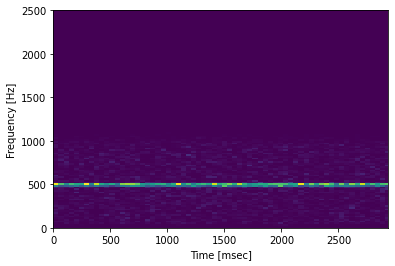

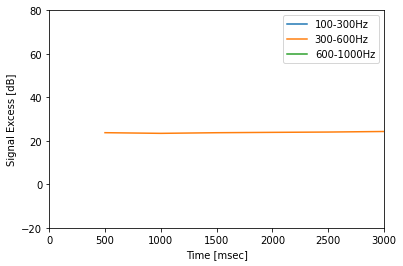

In [6]:
import masking_analysis.sound as sound
from masking_analysis.sound import Sound
from masking_analysis.masking import MaskingAnalyzer, masking_analyzer_from_exp_config_txt
import matplotlib.pyplot as plt

analyzer = masking_analyzer_from_exp_config_txt(
    './test_data/experiment_config_example.textproto')

analyzer.plot_signal_and_noise_spectrogram()
analyzer.plot_signal_excesses()

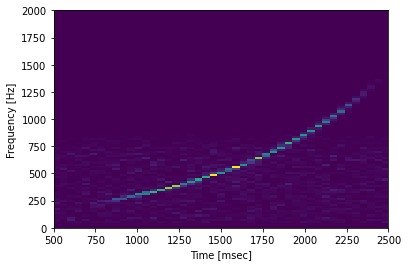

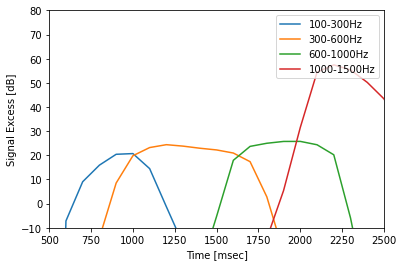

In [7]:
from masking_analysis.masking import masking_analyzer_from_exp_config_txt
import matplotlib.pyplot as plt

analyzer = masking_analyzer_from_exp_config_txt(
    './test_data/experiment_config_example_with_position.textproto')
analyzer.plot_signal_and_noise_spectrogram(f_min=0, f_max=2000, t_min=500, t_max=2500)
analyzer.plot_signal_excesses(db_min=-10, db_max=80, t_min=500, t_max=2500)

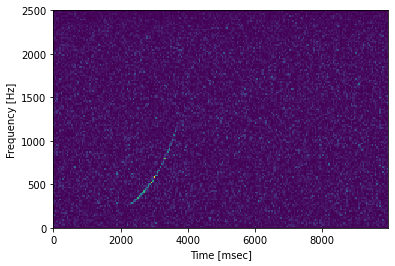

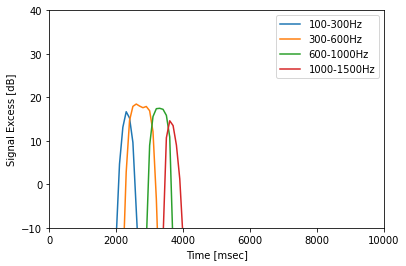

In [8]:
import masking_analysis.sound as sound
from masking_analysis.sound import Sound
from masking_analysis.masking import MaskingAnalyzer, masking_analyzer_from_exp_config_txt
import matplotlib.pyplot as plt

analyzer = masking_analyzer_from_exp_config_txt(
    './test_data/experiment_config_wav_noise_with_position.textproto')

analyzer.plot_signal_and_noise_spectrogram()
analyzer.plot_signal_excesses(db_min=-10, db_max=40)